In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("winequality-white.csv",sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
data.shape

(4898, 12)

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
target = data["quality"]
target

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [8]:
data.drop(["fixed acidity","volatile acidity","free sulfur dioxide","total sulfur dioxide"],axis=1,inplace=True)

In [9]:
features = data.iloc[:,:-1]
features

,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
0,0.36,20.7,0.045,1.00100,3.00,0.45,8.8
1,0.34,1.6,0.049,0.99400,3.30,0.49,9.5
2,0.40,6.9,0.050,0.99510,3.26,0.44,10.1
3,0.32,8.5,0.058,0.99560,3.19,0.40,9.9
4,0.32,8.5,0.058,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...
4893,0.29,1.6,0.039,0.99114,3.27,0.50,11.2
4894,0.36,8.0,0.047,0.99490,3.15,0.46,9.6
4895,0.19,1.2,0.041,0.99254,2.99,0.46,9.4
4896,0.30,1.1,0.022,0.98869,3.34,0.38,12.8


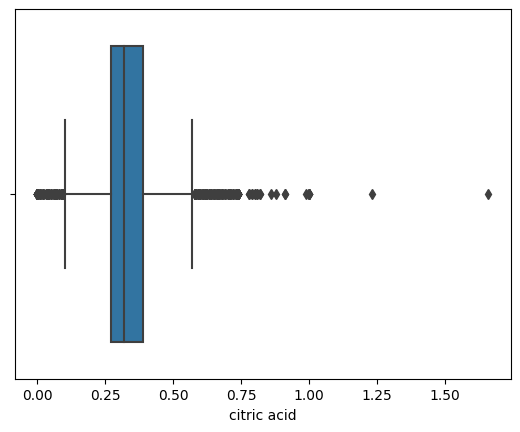

In [10]:
sns.boxplot(data=features,x="citric acid");

In [11]:
q1 = np.quantile(data["citric acid"],0.25)
q3 = np.quantile(data["citric acid"],0.75)
iqr = q3-q1
upper_whisker = q3+1.5*iqr
lower_whisker = q1-1.5*iqr


In [12]:
upper_whisker

0.5700000000000001

In [13]:
lower_whisker

0.09000000000000002

In [14]:
data["citric acid"] = data.loc[data["citric acid"]>0.57,"citric acid"]=0.57

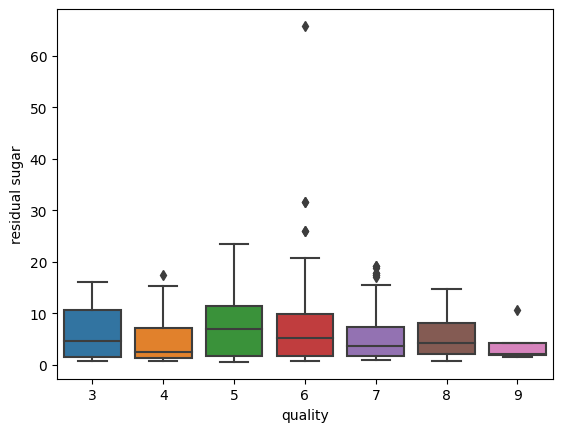

In [15]:
sns.boxplot(data=features,x=target,y="residual sugar");

In [16]:
data.corr().style.background_gradient()

,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
citric acid,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,nan,1.000000,0.088685,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,nan,0.088685,1.000000,0.257211,-0.090439,0.016763,-0.360189,-0.209934
density,nan,0.838966,0.257211,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,nan,-0.194133,-0.090439,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,nan,-0.026664,0.016763,0.074493,0.155951,1.000000,-0.017433,0.053678
alcohol,nan,-0.450631,-0.360189,-0.780138,0.121432,-0.017433,1.000000,0.435575
quality,nan,-0.097577,-0.209934,-0.307123,0.099427,0.053678,0.435575,1.000000


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.3,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred = linreg.predict(xtest)

In [19]:
ypred

array([5.39558297, 5.66565771, 6.06630001, ..., 5.61805319, 5.50814274,
       6.18310805])

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.23402957054328588

In [21]:
trainacc = linreg.score(xtrain,ytrain)
testacc = linreg.score(xtest,ytest)

In [22]:
trainacc

0.22834758019611856

In [23]:
testacc

0.23402957054328588